
# 🏠 Predição de Valores Imobiliários com SVR — California Housing

Este projeto aplica técnicas de **regressão com SVR (Support Vector Regressor)** para prever os valores médios das casas no estado da Califórnia, utilizando o famoso dataset público `fetch_california_housing`.

---


## 🗂️ Sobre o Dataset — California Housing

O dataset **California Housing** é um conjunto de dados público disponível via `sklearn.datasets.fetch_california_housing`. Ele foi originalmente derivado do censo de 1990 e tem como objetivo **prever o valor médio das residências em uma determinada região da Califórnia**, com base em características socioeconômicas e geográficas.

### 🔢 Informações Gerais:

- **Amostras**: 20.640 instâncias
- **Variável alvo (`target`)**: Valor médio das residências, em centenas de milhares de dólares
- **Tipo do problema**: Regressão

### 📌 Atributos (Features):

| Variável          | Descrição                                                        |
|-------------------|------------------------------------------------------------------|
| `MedInc`          | Renda média dos domicílios na região                             |
| `HouseAge`        | Idade média das casas                                            |
| `AveRooms`        | Número médio de cômodos por residência                           |
| `AveBedrms`       | Número médio de quartos por residência                           |
| `Population`      | População total da região                                        |
| `AveOccup`        | Número médio de residentes por domicílio                         |
| `Latitude`        | Latitude da região                                               |
| `Longitude`       | Longitude da região                                              |
| `target`          | Valor médio das residências (em centenas de milhares de dólares) |

### 🔧 Observações:
- O dataset é amplamente usado para benchmarking em tarefas de regressão.
- Ele não contém valores ausentes.
- A granularidade dos dados representa blocos censitários (subdivisões geográficas).

---


## 🎯 Objetivo

- Analisar e modelar o valor médio dos imóveis residenciais por região na Califórnia.
- Utilizar **engenharia de atributos**, **remoção de outliers**, **normalização** e **validação cruzada**.
- Testar diferentes **combinações de hiperparâmetros** usando RandomizedSearchCV.
- Avaliar o desempenho com múltiplas métricas de regressão.

---

## 🔍 Etapas do Projeto

### 1. Carregamento dos Dados
- Utilizado o dataset `fetch_california_housing`.
- Renomeada a coluna `MedHouseVal` para `target`.

### 2. Análise Exploratória
- Estatísticas descritivas (`describe()`)
- Verificação de valores ausentes (`isnull()`)
- Análise de correlação com `heatmap`
- Visualização de outliers com `boxplot`
- Distribuição das variáveis com `histogramas`

### 3. Engenharia de Atributos
Foram criadas três novas variáveis:
- `Bedrooms_per_Room = AveBedrms / AveRooms`
- `Rooms_per_Age = AveRooms / (HouseAge + 1)`
- `Income_per_Room = MedInc / AveRooms`

Colunas removidas por baixa correlação ou redundância:
- `AveBedrms`, `AveOccup`, `Population`, `Longitude`

### 4. Tratamento de Outliers
- Utilizado o método do IQR (Intervalo Interquartil) para remoção.

### 5. Pré-processamento
- Padronização com `StandardScaler`
- Divisão dos dados em treino e teste com proporção 80/20

### 6. Modelagem com SVR
- Utilizado `RandomizedSearchCV` para encontrar melhores hiperparâmetros.
- Validação cruzada com `cv=3`
- Melhor combinação encontrada: `{'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.5, 'degree': 3, 'C': 1}`

### 7. Avaliação do Modelo
Métricas utilizadas:
- **RMSE**: 0.708
- **MAE** : 0.506
- **R²**  : 0.617
- **MAPE**: 0.307
- **MedAE**: 0.367
- **Max Error**: 3.937

### 8. Visualizações
- Gráfico de dispersão: Valores reais vs preditos com linha de tendência
- Histograma dos resíduos (erros)
- Gráfico Hexbin: Densidade de pontos reais vs preditos

---

## 📈 Régua de Qualidade das Métricas

| **Métrica**         | **O que mede**                               | **Quando usar**                                           | **Régua de Qualidade (Interpretação)**                                 |
|---------------------|----------------------------------------------|------------------------------------------------------------|-------------------------------------------------------------------------|
| **RMSE**            | Raiz do erro quadrático médio                | Penaliza **mais erros grandes**                           | ✅ < 50 (ótimo)<br>🟡 50–70 (ok)<br>🔴 > 70 (alto erro)                 |
| **MAE**             | Erro médio absoluto                          | Indica **erro médio real em unidades da variável alvo**   | ✅ < 45 (ótimo)<br>🟡 45–65 (moderado)<br>🔴 > 65 (alto erro)           |
| **R² (R-quadrado)** | Proporção da variância explicada pelo modelo | Avaliação **geral da qualidade do modelo**                | ✅ > 0.80 (excelente)<br>🟡 0.60–0.80 (bom)<br>🔴 < 0.60 (baixo)        |
| **MAPE**            | Erro percentual médio absoluto               | Quando é útil comparar com a escala do próprio target (%) | ✅ < 10% (excelente)<br>🟡 10–30% (aceitável)<br>🔴 > 30% (ruim)        |
| **MedAE**           | Mediana dos erros absolutos                  | Resistente a **outliers**, boa alternativa ao MAE         | ✅ < 35 (ótimo)<br>🟡 35–60 (ok)<br>🔴 > 60 (alto erro)                 |
| **Max Error**       | Maior erro absoluto registrado               | Ajuda a avaliar **casos extremos**                        | ✅ < 3.0 (ótimo)<br>🟡 3.0–5.0 (aceitável)<br>🔴 > 5.0 (grande outlier) |

---

## 📷 Visualizações Geradas

| Gráfico                                        | Descrição                                                                                     |
|-----------------------------------------------|-----------------------------------------------------------------------------------------------|
| 🔶 **Heatmap de Correlação**                   | Mostra as correlações entre as variáveis, incluindo a relação com a variável `target`        |
| 📊 **Boxplot Horizontal Geral**                | Mostra os outliers e a distribuição das variáveis numéricas (exceto o target)                |
| 📊 **Histogramas Individuais**                 | Mostra a distribuição de cada variável numérica do dataset                                   |
| 🔷 **Boxplots em Subplots por Feature**        | Visualiza individualmente o comportamento e os outliers das variáveis após engenharia        |
| 🔵 **Dispersão Real vs Predito (Scatterplot)** | Mostra a aderência dos valores preditos em relação aos valores reais, com linha ideal        |
| 🟣 **Histograma de Resíduos**                  | Analisa a distribuição dos erros (diferença entre valor real e predito), centrado em zero    |
| 🟪 **Hexbin Plot (Densidade Real vs Predito)** | Mostra a densidade de pontos reais vs preditos, ideal para identificar padrões e dispersão   |


---


## 📦 Dependências

```bash
pip install pandas numpy matplotlib seaborn scikit-learn
```

---

## 🧠 Conclusões

- O SVR apresentou desempenho consistente, explicando aproximadamente 62% da variância dos dados.
- A engenharia de atributos e a remoção de outliers ajudaram a melhorar a performance.
- As múltiplas métricas oferecem uma visão completa da qualidade do modelo.


In [ ]:
# 📚 Imports
from sklearn.datasets import fetch_california_housing
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error, max_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


In [74]:
# 📦 Carregando o dataset
california = fetch_california_housing(as_frame=True)
df = california.frame.copy()
df.rename(columns={"MedHouseVal": "target"}, inplace=True)

# 📌 VISÃO GERAL DO DATASET:
print("\n📌 VISÃO GERAL DO DATASET:\n")
print(df.head())

# 📌 INFO:
print("\n📌 INFO:\n")
print(df.info())

# 📌 DESCRIÇÃO ESTATÍSTICA:
print("\n📌 DESCRIÇÃO ESTATÍSTICA:\n")
print(df.describe())

# 📌 VALORES AUSENTES:
print("\n📌 VALORES AUSENTES:\n")
print(df.isnull().sum())

# 📌 CORRELAÇÃO COM O TARGET:
print("\n📌 CORRELAÇÃO COM O TARGET:\n")
correlacoes = df.corr()["target"].sort_values(ascending=False)
print(correlacoes)



📌 VISÃO GERAL DO DATASET:

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

📌 INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Populati

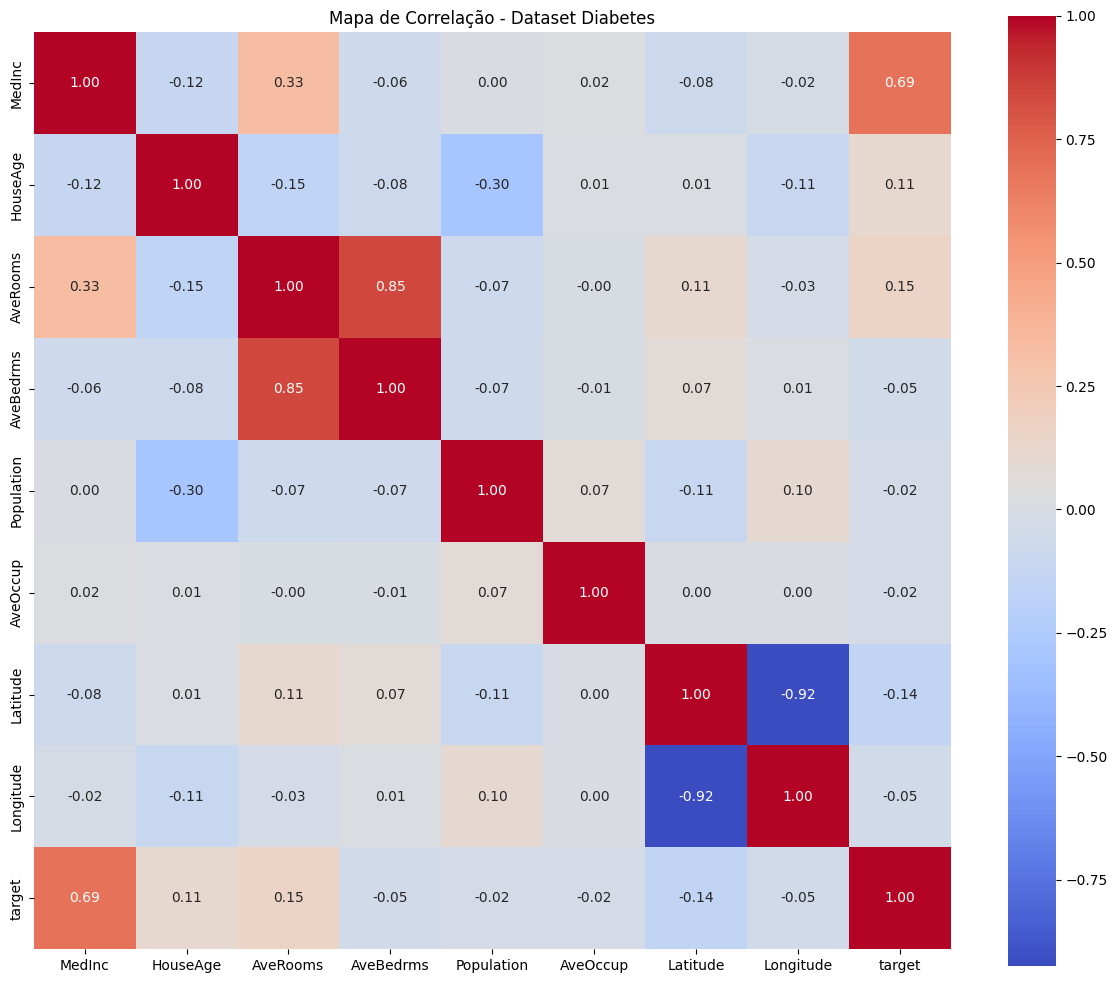

In [75]:
# 📊 Heatmap de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Mapa de Correlação - Dataset Diabetes")
plt.tight_layout()
plt.show()

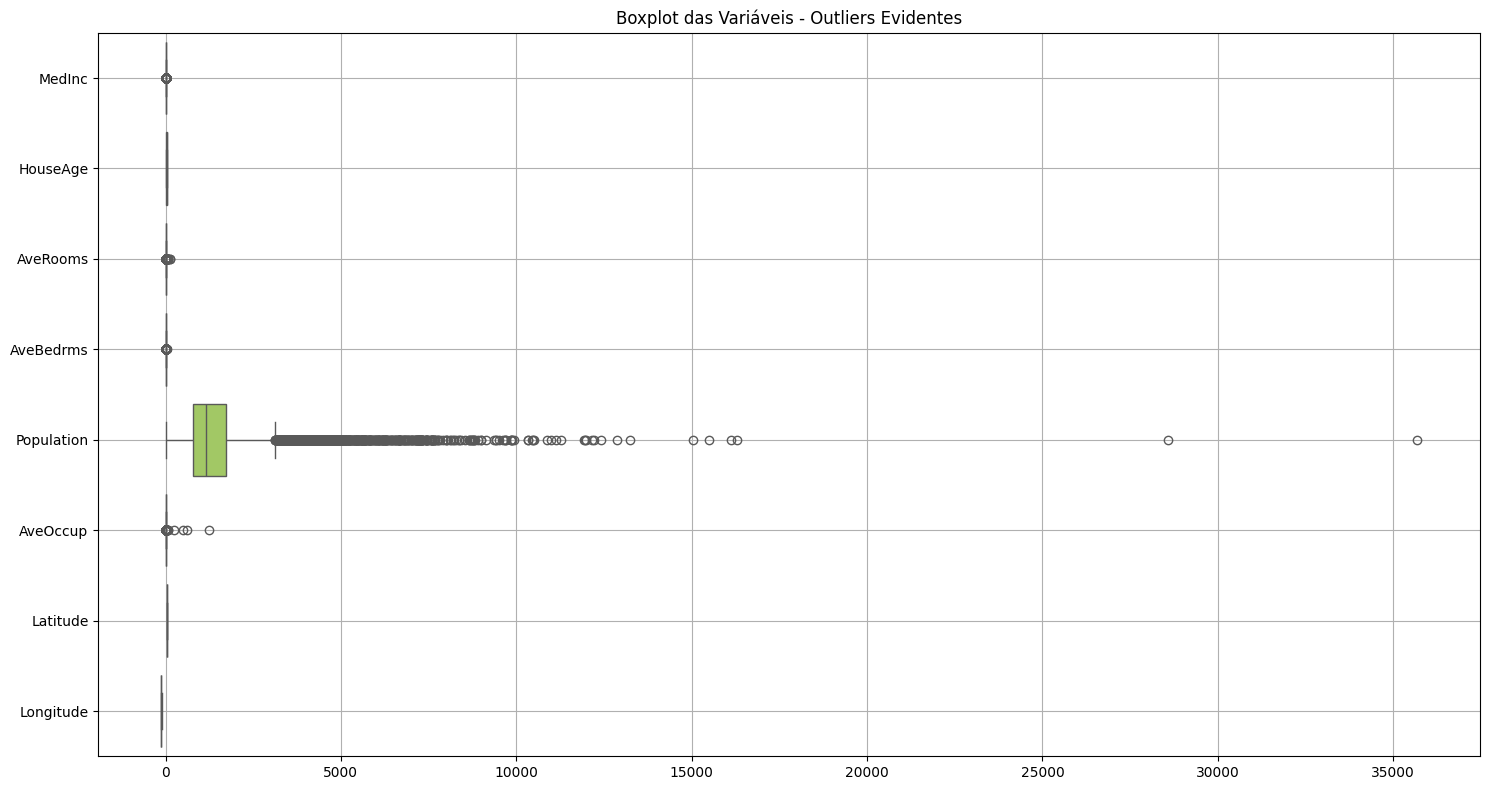

In [76]:
# Visualizar os dados com BoxPlot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns='target'), orient='h', palette='Set2')
plt.title("Boxplot das Variáveis - Outliers Evidentes")
plt.grid(True)
plt.tight_layout()
plt.show()

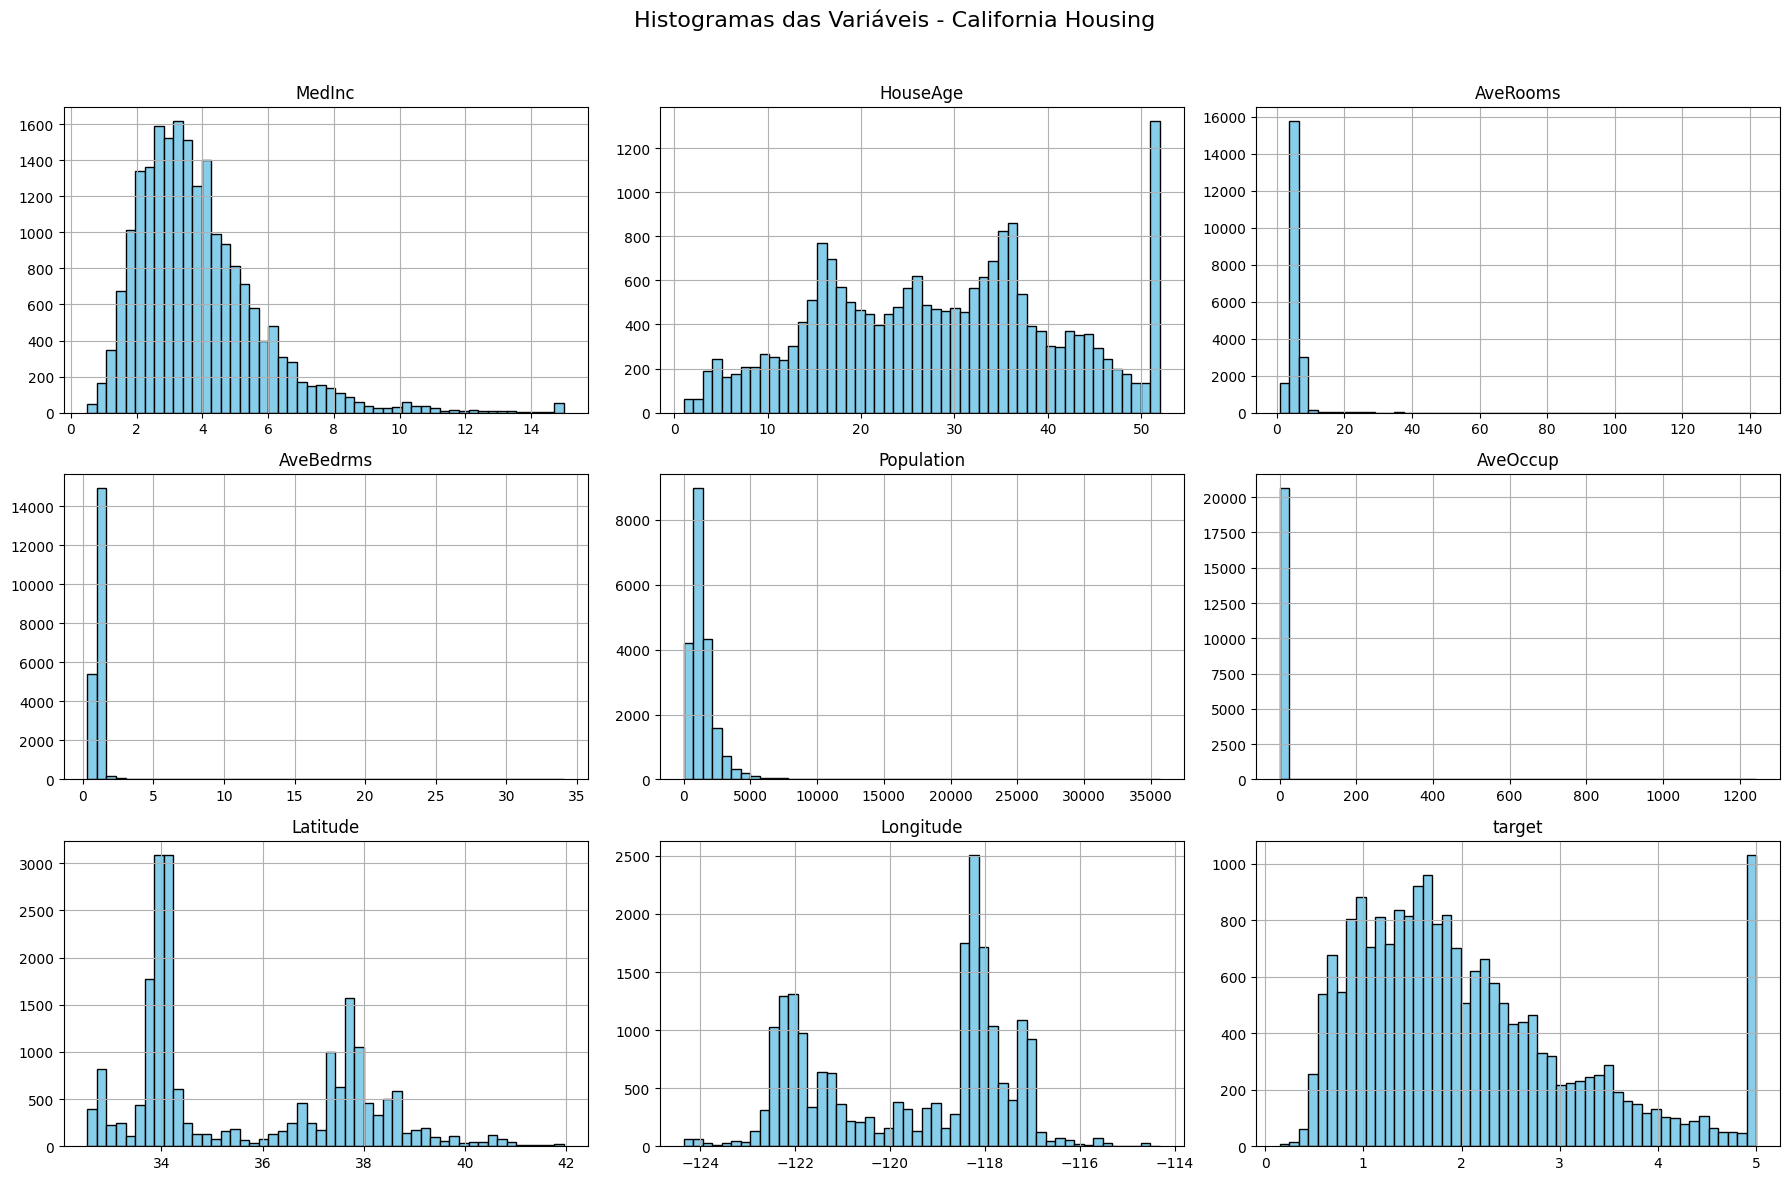

In [77]:
# Visualizar os dados com Histogramas
df.hist(bins=50, figsize=(18, 12), edgecolor='black', color='skyblue')
plt.suptitle("Histogramas das Variáveis - California Housing", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [78]:
# Engenharia de atributos
df["Bedrooms_per_Room"] = df["AveBedrms"] / df["AveRooms"]
df["Rooms_per_Age"] = df["AveRooms"] / (df["HouseAge"] + 1)
df["Income_per_Room"] = df["MedInc"] / df["AveRooms"]

# Remover colunas redundantes ou irrelevantes
df.drop(columns=["AveBedrms", "AveOccup", "Population", "Longitude"], inplace=True)


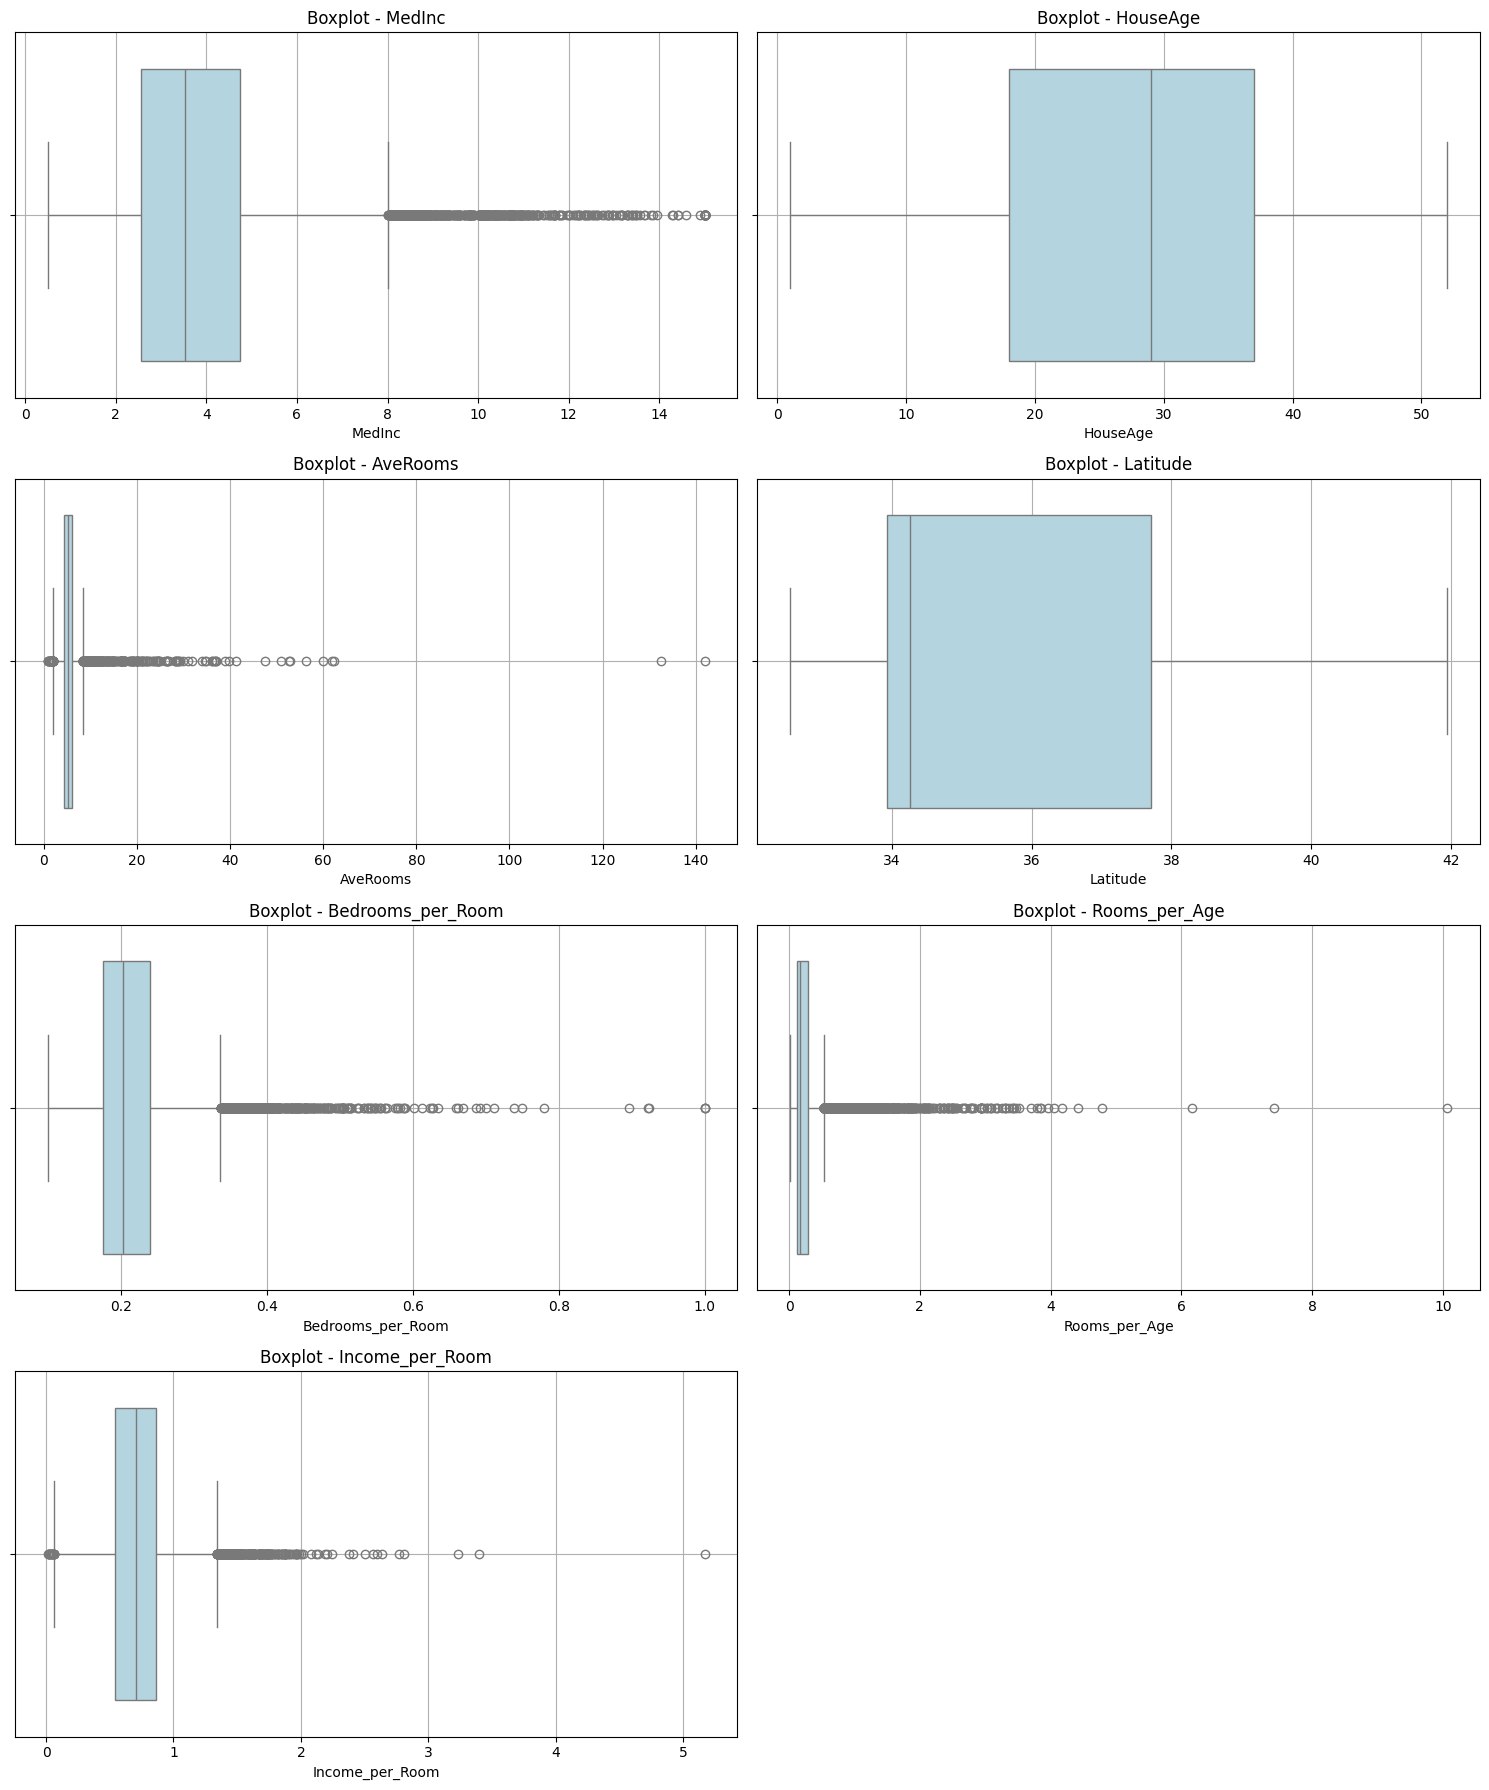

In [79]:
# Selecionar variáveis
variaveis = ["MedInc", "HouseAge", "AveRooms", "Latitude",
             "Bedrooms_per_Room", "Rooms_per_Age", "Income_per_Room"]

# Criar os subplots: 4 linhas no padrão 2-2-2-1
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
axes = axes.flatten()

for i, var in enumerate(variaveis):
    sns.boxplot(x=df[var], ax=axes[i], color="lightblue")
    axes[i].set_title(f"Boxplot - {var}")
    axes[i].grid(True)

# Remove o último subplot que sobra (posição 8)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [80]:
# 🧹 Seleção final de variáveis
X = df[["MedInc", "HouseAge", "AveRooms", "Latitude",
        "Bedrooms_per_Room", "Rooms_per_Age", "Income_per_Room"]]
y = df["target"]

In [81]:
# 🧹 Remove outliers com base no intervalo interquartil (IQR)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

filtro = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X_filtrado = X[filtro]
y_filtrado = y[filtro]

In [82]:
# ⚖️ Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔀 Split dos dados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [83]:
# 🎲 Espaço de busca aleatória
param_dist = {
    "C": [1, 10, 100, 500],
    "epsilon": [0.05, 0.1, 0.2, 0.5],
    "kernel": ["rbf", "linear", "poly"],
    "gamma": ["scale", "auto"],
    "degree": [2, 3, 4]  # só será usado se kernel="poly"
}

# 🔍 RandomizedSearch com 20 iterações aleatórias
random_search = RandomizedSearchCV(
    SVR(),
    param_distributions=param_dist,
    n_iter=10,              # número de combinações testadas
    scoring="r2",
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [84]:
# 📊 Avaliação
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)

print("🏆 Melhor combinação de parâmetros:", random_search.best_params_)
print(f"✅ RMSE: {rmse:.3f}")
print(f"✅ MAE : {mae:.3f}")
print(f"✅ R²  : {r2:.3f}")
print(f"📉 MAPE: {mape:.3f}")
print(f"📏 MedAE: {medae:.3f}")
print(f"🚨 Max Error: {max_err:.3f}")

🏆 Melhor combinação de parâmetros: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.5, 'degree': 3, 'C': 1}
✅ RMSE: 0.708
✅ MAE : 0.506
✅ R²  : 0.617
📉 MAPE: 0.307
📏 MedAE: 0.367
🚨 Max Error: 3.937


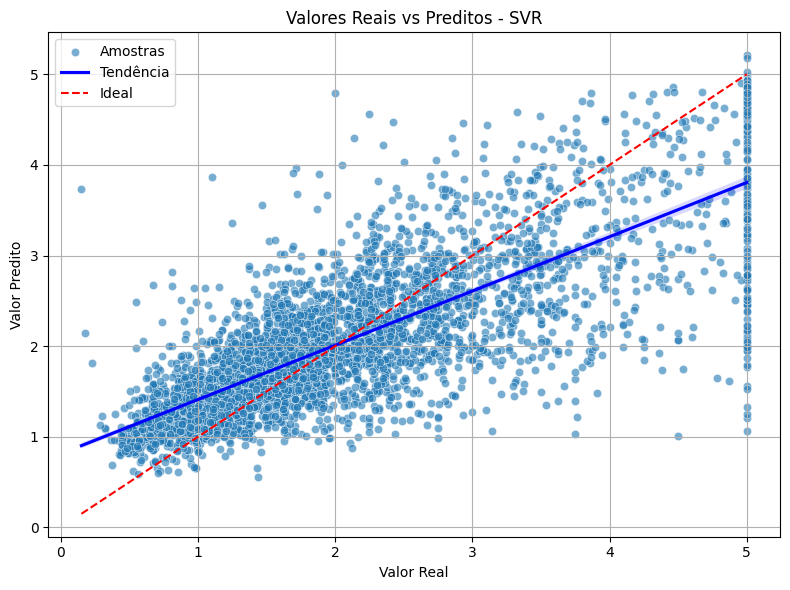

In [85]:
# Visualizar Valores Reais x Peditos com ScatterPlot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label="Amostras")
sns.regplot(x=y_test, y=y_pred, scatter=False, color='blue', label='Tendência')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Valores Reais vs Preditos - SVR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


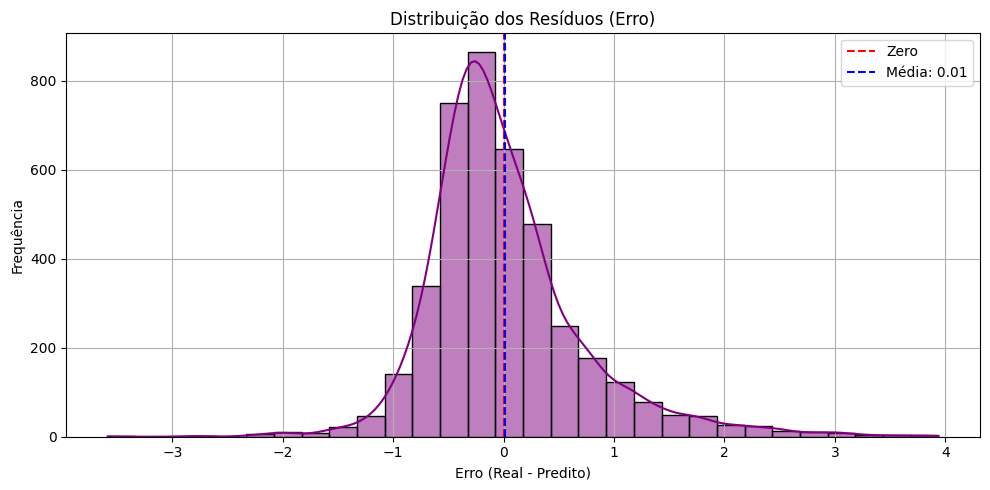

In [86]:
# Visualizar distribuição dos resíduos com Histplot
residuos = y_test - y_pred
media_residuo = residuos.mean()

plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, bins=30, color='purple')
plt.axvline(0, color='red', linestyle='--', label='Zero')
plt.axvline(media_residuo, color='blue', linestyle='--', label=f'Média: {media_residuo:.2f}')
plt.title("Distribuição dos Resíduos (Erro)")
plt.xlabel("Erro (Real - Predito)")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


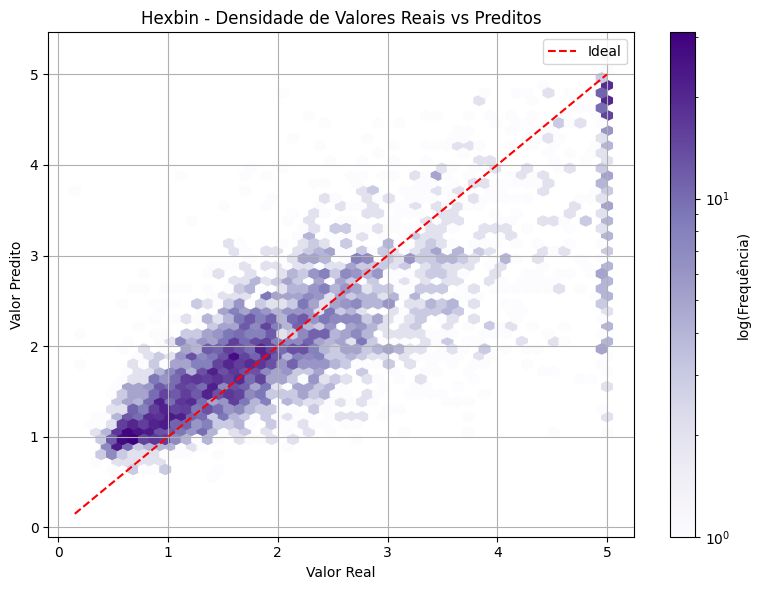

In [87]:
# 📊 Gráfico Hexbin - Densidade de Valores Reais vs Preditos
plt.figure(figsize=(8, 6))
plt.hexbin(y_test, y_pred, gridsize=50, cmap='Purples', bins='log')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.colorbar(label='log(Frequência)')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Hexbin - Densidade de Valores Reais vs Preditos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
